###  **1. Import Libraries:**

In [1]:
import os
import cv2
import h5py
import datetime
import numpy as np
import glob
from PIL import Image
from PIL import ImageOps
from tensorflow.keras.utils import Sequence
from tensorflow.python import debug as tf_debug  # Import TensorFlow Debugger
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-25 05:20:44.089020: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 05:20:44.089141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 05:20:44.218762: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# from datetime import datetime
# current_now = datetime.now().date()
# print(f'Current Time {current_now}')
# converting_time  = datetime.now().strftime("%H:%M:%S")
# print(f'Type of the datetime {type(converting_time)}')

In [3]:
import tensorflow as tf

# Get the current default float type for GPU memory
gpu_memory_precision = tf.keras.backend.floatx()
print("Default GPU memory precision in TensorFlow:", gpu_memory_precision)


Default GPU memory precision in TensorFlow: float32


In [4]:
# logs_dir = os.path.join(os.getcwd(), 'logs')

# if not os.path.exists(logs_dir):
#     os.makedirs(logs_dir)

# !rm -rf ./logs/fit

In [5]:
# !rm -rf ./logs/fit

In [6]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard

In [7]:
# class DataGenerator(Sequence):
#     def __init__(self, images_dir, batch_size=32, shuffle=True, augmentation=True, **kwargs):
#         super().__init__(**kwargs)
#         self.images_dir = images_dir
#         self.batch_size = batch_size
#         self.shuffle = shuffle
#         self.augmentation = augmentation
#         self.image_paths = glob.glob(os.path.join(images_dir, '*.jpg'))
#         self.indexes = np.arange(len(self.image_paths))
#         if self.shuffle:
#             np.random.shuffle(self.indexes)
        
#         # Initialize ImageDataGenerator for augmentation
#         if self.augmentation:
#             self.data_generator = ImageDataGenerator(horizontal_flip=True)
    
#     def __len__(self):
#         return int(np.ceil(len(self.image_paths) / self.batch_size))
    
#     def __getitem__(self, index):
#         batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
#         batch_inputs, batch_outputs, original_inputs, original_outputs = [], [], [], []
#         for i in batch_indexes:
#             img_path = self.image_paths[i]
#             original_image = self._load_input(img_path)
#             augmented_input = original_image.copy()  # Make a copy for augmentation
#             original_output = self._load_output(img_path)
#             augmented_output = original_output.copy()

#             # Generate random transformation parameters
#             if self.augmentation:
#                 input_params = self.data_generator.get_random_transform(original_image.shape)
#                 output_params = self.data_generator.get_random_transform(original_output.shape)

#             # Apply data augmentation to input image
#             if self.augmentation:
#                 # Ensure input image is in the correct format for augmentation
#                 augmented_input = self.ensure_image_format(augmented_input)
#                 augmented_input = self.data_generator.apply_transform(augmented_input, input_params)

#             # Apply data augmentation to output image
#             if self.augmentation:
#                 # Ensure output image is in the correct format for augmentation
#                 augmented_output = self.ensure_image_format(augmented_output)
#                 augmented_output = self.data_generator.apply_transform(augmented_output, output_params)

#             batch_inputs.append(augmented_input)
#             batch_outputs.append(augmented_output)
#             original_inputs.append(original_image)
#             original_outputs.append(original_output)

#         return np.array(batch_inputs), np.array(batch_outputs), np.array(original_inputs), np.array(original_outputs)



#     def ensure_image_format(self, img):
#         if len(img.shape) == 2:  # If image is grayscale, convert to RGB
#             img = np.stack((img,) * 3, axis=-1)
#         elif len(img.shape) == 3 and img.shape[2] == 1:  # If image has single channel, convert to RGB
#             img = np.concatenate([img] * 3, axis=-1)
#         return img


    
#     def _load_input(self, img_path):
#         img = Image.open(img_path).convert('RGB')
#         img = np.array(img)
#         img = img / 255.0
#         return img

#     def _load_output(self, img_path):
#         gt_path = img_path.replace('.jpg', '.h5').replace('images', 'ground-truth-h5')
#         gt_file = h5py.File(gt_path, 'r')
#         target = np.asarray(gt_file['density'])
#         target = cv2.resize(target, (int(target.shape[1]/8), int(target.shape[0]/8)), interpolation=cv2.INTER_CUBIC) * 64
#         target = np.expand_dims(target, axis=-1)
#         return target

#     def generate(self):
#         while True:
#             np.random.shuffle(self.indexes)
#             for i in range(self.__len__()):
#                 yield self.__getitem__(i)

# # Instantiate the generator
# generator = DataGenerator(images_dir='/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/train_data/images', batch_size=4, augmentation=True)

# # Generate a batch
# inputs, outputs, original_inputs, original_outputs = generator.__getitem__(0)

# # Visualize the original and augmented images along with their corresponding outputs
# for i in range(len(inputs)):
#     fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#     axes[0].imshow(original_inputs[i])
#     axes[0].set_title('Original Image')
#     axes[0].axis('off')
    
#     axes[1].imshow(inputs[i])
#     axes[1].set_title('Augmented Image')
#     axes[1].axis('off')
    
#     plt.figure()
#     plt.imshow(original_outputs[i][:, :, 0], cmap='jet')
#     plt.title('Original Output')
#     plt.axis('off')
#     plt.colorbar()
#     plt.show()
    
#     plt.figure()
#     plt.imshow(outputs[i][:, :, 0], cmap='jet')
#     plt.title('Augmented Output')
#     plt.axis('off')
#     plt.colorbar()
#     plt.show()


In [8]:
# # Define the main root directory and image paths for training and validation
# main_root_directory = os.getcwd()
# training_root_diectory = os.path.join(main_root_directory, 'ShanghaiTech/part_B', 'train_data/images')
# test_root_directory = os.path.join(main_root_directory, 'ShanghaiTech/part_B', 'test_data/images')
# images_path_training = glob.glob(os.path.join(training_root_diectory,'*.jpg'))
# images_path_test = glob.glob(os.path.join(test_root_directory,'*.jpg'))

In [9]:
# # Size of the trainig and test data
# print(f"Length or size of the training data set {len(images_path_training)}")
# print(f"Length or size of the test data set {len(images_path_test)}")

In [10]:
class DataGenerator(Sequence):
    def __init__(self, images_dir, batch_size=32, shuffle=True, augmentation=True, **kwargs):
        super().__init__(**kwargs)
        self.images_dir = images_dir
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augmentation = augmentation
        self.image_paths = glob.glob(os.path.join(images_dir, '*.jpg'))
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)
        
        # Initialize ImageDataGenerator for augmentation
        if self.augmentation:
            self.data_generator = ImageDataGenerator(horizontal_flip=True)
    
    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))
    

    def __getitem__(self, index):
        batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        batch_inputs, batch_outputs = [], []
        for i in batch_indexes:
            img_path = self.image_paths[i]
            input_img = self._load_input(img_path)
            output_img = self._load_output(img_path)
            # Convert input and output data types if needed
            input_img = tf.cast(input_img, dtype=tf.float32)  # Convert input to float32
            output_img = tf.cast(output_img, dtype=tf.float32)  # Convert output to float32
        
#             print('Data type of the input',type(input_img),input_img.dtype)
#             print('Data type of the output',type(output_img),input_img.dtype)
            batch_inputs.append(input_img)
            batch_outputs.append(output_img)

#         # Print data types of batch_inputs and batch_outputs
#         print("Data type of batch_inputs:", type(batch_inputs))
#         print("Data type of batch_outputs:", type(batch_outputs))

        return np.array(batch_inputs), np.array(batch_outputs)


    def _load_input(self, img_path):
        img = Image.open(img_path).convert('RGB')
        img = np.array(img)
        img = img / 255.0
        # Apply data augmentation
        if self.augmentation:
            img = self.data_generator.random_transform(img)
        return img

    def _load_output(self, img_path):
        gt_path = img_path.replace('.jpg', '.h5').replace('images', 'ground-truth-h5')
        gt_file = h5py.File(gt_path, 'r')
        target = np.asarray(gt_file['density'])
        target = cv2.resize(target, (int(target.shape[1]/8), int(target.shape[0]/8)), interpolation=cv2.INTER_CUBIC) * 64
        target = np.expand_dims(target, axis=-1)
        return target

    def generate(self):
        while True:
            np.random.shuffle(self.indexes)
            for i in range(self.__len__()):
                yield self.__getitem__(i)

### **3. Define Functions for Data Preprocessing**

In [11]:
# def create_img(path):
#     # Load, normalize, and resize image
#     img = Image.open(path).convert('RGB')
#     img = np.array(img)
#     #original_image = img.copy()
#     img = img / 255.0
#     return img

# def get_input(path):
#     #print(f"Inside the function - {path}")
#     img = create_img(path)
#     return img

# def get_output(path):settings
#     gt_file = h5py.File(path, 'r')
#     target = np.asarray(gt_file['density'])
# #   print(f" Target Value output - {target}")
#     image = cv2.resize(target, (int(target.shape[1]/8), int(target.shape[0]/8)), interpolation=cv2.INTER_CUBIC) * 64
#     img = np.expand_dims(image, axis=-1)
#     return img


In [12]:
# path = images_path_training[0]
# path

In [13]:
# img,original_image = get_input(path)
# resized_image,target = get_output(path.replace('.jpg', '.h5').replace('images', 'ground-truth-h5'))

In [14]:
# # Plot the original image
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 4, 1)
# plt.imshow(original_image)
# plt.title("Original Image")
# plt.axis('off')


# # Plot the original image
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 4, 1)
# plt.imshow(img)
# plt.title("Normalized Image")
# plt.axis('off')


# # Plot the target density map
# plt.subplot(1, 4, 2)
# plt.imshow(target, cmap='jet')
# plt.title("Target Density Map")
# plt.colorbar()
# plt.axis('off')

# # Plot the resized density map
# plt.subplot(1, 4, 3)
# plt.imshow(resized_image, cmap='jet')
# plt.title("Resized Density Map")
# plt.colorbar()
# plt.axis('off')

# plt.tight_layout()
# plt.show()

### **4. Define Image Data Generator**

In [15]:
# def image_generator(files, batch_size=64):
#     while True:
#         input_path = np.random.choice(a=files, size=batch_size)
#         batch_input = []
#         batch_output = []
#         for path in input_path:
#             inputt = get_input(path)
#             output = get_output(path.replace('.jpg', '.h5').replace('images', 'ground-truth-h5'))
#             batch_input.append(inputt)
#             batch_output.append(output)
#         batch_x = np.array(batch_input)
#         batch_y = np.array(batch_output)
#         #print(f'batch_x --> {len(batch_x)},batch_y --> {len(batch_y)}')
#         yield(batch_x, batch_y)

### **5. Define Model Architecture** 

In [16]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K

In [17]:
def euclidean_distance_loss(y_true, y_pred):
    # Euclidean distance as a measure of loss (Loss function) 
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

In [18]:
# Load pre-trained weights for VGG16 frontend
def load_vgg16_frontend_weights(model):
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    vgg16_layers_names = [layers.name for layers in vgg16.layers]
    for layer in model.layers:
        if layer.name in vgg16_layers_names:
            layer.set_weights(vgg16.get_layer(layer.name).get_weights())
            layer.trainable = False  # Make the layer non-trainable
            #print("Loaded weights for layer:", layer.name)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import RandomNormal

def vgg16_frontend(input_shape=(None, None, 3), use_batch_norm=True):

    # Define VGG16 Architecture up to block4
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs

    # Block 1
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', name='block1_conv1')(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D(strides=(2, 2), name='block1_pool')(x)
    
    if use_batch_norm:
        x = BatchNormalization()(x)

    # Block 2
    x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D(strides=(2, 2), name='block2_pool')(x)
    
    if use_batch_norm:
        x = BatchNormalization()(x)

    # Block 3
    x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D(strides=(2, 2), name='block3_pool')(x)
    
    if use_batch_norm:
        x = BatchNormalization()(x)

    # Block 4
    x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', name='block4_conv3')(x)

    model = Model(inputs, x, name='vgg16_frontend')
    # Load VGG16 frontend weights
    load_vgg16_frontend_weights(model)  # Assuming this function is defined elsewhere
    return model


def dilated_convolution(input_layer, use_batch_norm=True):
    # Define the initializer with specified mean and standard deviation
    initializer = RandomNormal(stddev=0.01)

    # Dilated convolution for density map generation
    x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', dilation_rate=2,
               kernel_initializer=initializer, padding='same', name='Dilated_512_layer_1')(input_layer)
    if use_batch_norm:
        x = BatchNormalization()(x)
        
    x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', dilation_rate=2,
               kernel_initializer=initializer, padding='same', name='Dilated_512_layer_2')(x)
    if use_batch_norm:
        x = BatchNormalization()(x)
        
    x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', dilation_rate=2,
               kernel_initializer=initializer, padding='same', name='Dilated_512_layer_3')(x)
    if use_batch_norm:
        x = BatchNormalization()(x)
        
    x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', dilation_rate=2,
               kernel_initializer=initializer, padding='same', name='Dilated_256_layer')(x)
    if use_batch_norm:
        x = BatchNormalization()(x)
        
    x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', dilation_rate=2,
               kernel_initializer=initializer, padding='same', name='Dilated_128_layer')(x)
    if use_batch_norm:
        x = BatchNormalization()(x)
        
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', dilation_rate=2,
               kernel_initializer=initializer, padding='same', name='Dilated_64_layer')(x)
    if use_batch_norm:
        x = BatchNormalization()(x)
    
    x = Conv2D(filters=1, kernel_size=(1, 1), dilation_rate=1, padding='same',
               kernel_initializer=initializer, name='Dilated_1x1_layer')(x)
    
    return x


In [20]:

# Combine VGG16 frontend and dilated convolution
def crowd_counting_model(input_shape=(None, None, 3)):
    # Define VGG16 frontend
    vgg16_fe = vgg16_frontend(input_shape,use_batch_norm=False)
    
    # Define dilated convolution
    input_layer = vgg16_fe.output
    print(input_layer)
    output_layer = dilated_convolution(input_layer, use_batch_norm=False)
    
    # Create model
    model = Model(inputs=vgg16_fe.input, outputs=output_layer, name='crowd_counting_model')
    return model

In [21]:
input_shape = (None, None, 3)  # Input shape can vary in size
model = crowd_counting_model(input_shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_13>


In [22]:
model.summary()

Model: "crowd_counting_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dilated_512_layer_1 (Conv2D)    │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dilated_512_layer_2 (Conv2D)    │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dilated_512_layer_3 (Conv2D)    │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dilated_256_layer (Conv2D)      │ (None, None, None,     │     1,179,904 │
│                                 │ 256)                   │             

 Total params: 16,263,489 (62.04 MB)

 Trainable params: 8,628,225 (32.91 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [23]:
from tensorflow.keras.callbacks import Callback
import numpy as np

class NanChecker(Callback):
    def __init__(self):
        self.nan_weights = {}

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.get_weights()
        nan_found = False
        for i, w in enumerate(weights):
            if np.isnan(np.sum(w)):
                layer_name = self.model.layers[i].name
                if layer_name not in self.nan_weights:
                    self.nan_weights[layer_name] = {'epoch': epoch}
                print(f"NaN values found in weights of layer '{layer_name}' at epoch {epoch}")
                nan_found = True
        if not nan_found:
            print("No NaN values found in weights.")
        if nan_found and len(self.nan_weights) == 1:
            print("Stopping training due to NaN values in weights.")
            self.model.stop_training = True

In [24]:
# # Set directories
# train_dir = '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/train_data/images'
# test_dir = '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/test_data/images'

# # Create data generators with augmentation
# train_generator = DataGenerator(train_dir, batch_size=1, shuffle=True, augmentation=True)
# test_generator = DataGenerator(test_dir, batch_size=1, shuffle=False, augmentation=False)

# #Early Stopping
# # early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
# #checpoints
# # checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# # Compile and train the model with gradient clipping# Modify the condition to check for any invalid elements in the loss array

# sgd = SGD(learning_rate=0.001, momentum=0.9)  # Example: clipnorm value can be adjusted
# model.compile(optimizer=sgd, loss=euclidean_distance_loss, metrics=['mse'])
# history = model.fit(train_generator, epochs=50, validation_data=test_generator)
# # history = model.fit(train_generator, epochs=50, validation_data=test_generat# Modify the condition to check for any invalid elements in the loss array


In [25]:
# logs_dir = os.path.join(os.getcwd(), 'logs')

# if not os.path.exists(logs_dir):
#     os.makedirs(logs_dir)

# !rm -rf ./logs/fit

In [26]:
# %tensorboard --logdir logs/fit

In [27]:
# Set directories
train_dir = r'/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/train_data/images'
test_dir = r'/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/test_data/images'


# Create data generators with augmentation
train_generator = DataGenerator(train_dir, batch_size=1, shuffle=True, augmentation=False)
test_generator = DataGenerator(test_dir, batch_size=1, shuffle=False, augmentation=False)

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Compile and train the model
sgd = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=sgd, loss=euclidean_distance_loss, metrics=['mse'])

history = model.fit(train_generator, epochs=50, validation_data=test_generator,callbacks=[NanChecker()])
model.save('my_model.keras')

Epoch 1/50


2024-04-25 05:21:00.937031: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.79695, expected 2.92563
2024-04-25 05:21:00.937108: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.31913, expected 3.44781
2024-04-25 05:21:00.937118: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.24147, expected 4.37014
2024-04-25 05:21:00.937126: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.67082, expected 4.79949
2024-04-25 05:21:00.937134: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.72579, expected 4.85447
2024-04-25 05:21:00.937142: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.25449, expected 4.38317
2024-04-25 05:21:00.937149: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.32392, expected 4.4526
2024-04-25 05:21:00.937157: E external/local_xla/xla/ser

  2/400 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - loss: 1.3010 - mse: 2.7689   

I0000 00:00:1714022476.470168      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.4449 - mse: 0.4689No NaN values found in weights.
400/400 ━━━━━━━━━━━━━━━━━━━━ 80s 151ms/step - loss: 0.4445 - mse: 0.4682 - val_loss: 0.1123 - val_mse: 0.0242
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1301 - mse: 0.0337No NaN values found in weights.
400/400 ━━━━━━━━━━━━━━━━━━━━ 56s 138ms/step - loss: 0.1301 - mse: 0.0337 - val_loss: 0.0474 - val_mse: 0.0063
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0914 - mse: 0.0174No NaN values found in weights.
400/400 ━━━━━━━━━━━━━━━━━━━━ 59s 147ms/step - loss: 0.0914 - mse: 0.0174 - val_loss: 0.0276 - val_mse: 0.0041
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0722 - mse: 0.0124No NaN values found in weights.
400/400 ━━━━━━━━━━━━━━━━━━━━ 58s 143ms/step - loss: 0.0722 - mse: 0.0124 - val_loss: 0.0374 - val_mse: 0.0052
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0709 - mse: 0.0119No NaN values found in weights.
400/40

In [28]:
# # Set directories
# train_dir = '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/train_data/images'
# test_dir = '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/test_data/images'

# # Create data generators with augmentation
# train_generator = DataGenerator(train_dir, batch_size=1, shuffle=True, augmentation=True)
# test_generator = DataGenerator(test_dir, batch_size=1, shuffle=False, augmentation=False)

# # Enable TensorFlow Debugger (tfdbg)
# tf.debugging.set_log_device_placement(True)

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# # Compile and train the model 
# sgd = SGD(learning_rate=0.001, momentum=0.9) 
# model.compile(optimizer=sgd, loss=euclidean_distance_loss, metrics=['mse'])
# history = model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=[tensorboard_callback])
# model.save('my_model.keras')

In [29]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

In [30]:
history.history

{'loss': [0.2625793516635895,
  0.10388606041669846,
  0.08588753640651703,
  0.07068616151809692,
  0.07322404533624649,
  0.059664782136678696,
  0.05457525700330734,
  0.05564052611589432,
  0.03743860125541687,
  0.040675412863492966,
  0.04170828312635422,
  0.04365788772702217,
  0.047490235418081284,
  0.057021841406822205,
  0.059993382543325424,
  0.06283633410930634,
  0.06926088035106659,
  0.06022105738520622,
  0.09452719986438751,
  0.0839667022228241,
  0.0883195698261261,
  0.08277495205402374,
  0.1065206453204155,
  0.09078990668058395,
  0.11874665319919586,
  0.12471731007099152,
  0.16448016464710236,
  0.11881832033395767,
  0.13747486472129822,
  0.15808917582035065,
  0.110639788210392,
  0.17492078244686127,
  0.13773246109485626,
  0.1204853355884552,
  0.1519017368555069,
  0.16029216349124908,
  0.19671571254730225,
  0.14269737899303436,
  0.13000231981277466,
  0.14019231498241425,
  0.21091963350772858,
  0.1601070761680603,
  0.16128084063529968,
  0.183

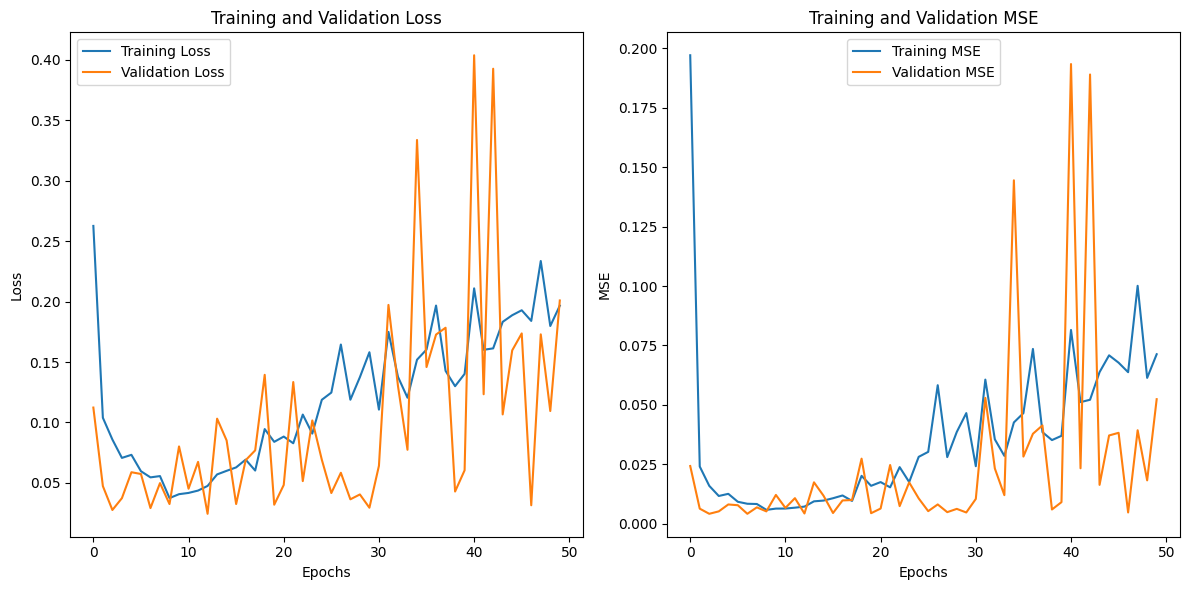

In [31]:
import matplotlib.pyplot as plt

# Plotting Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
from matplotlib import cm as CM

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
Shape of the Predicted Model (1, 96, 128, 1)


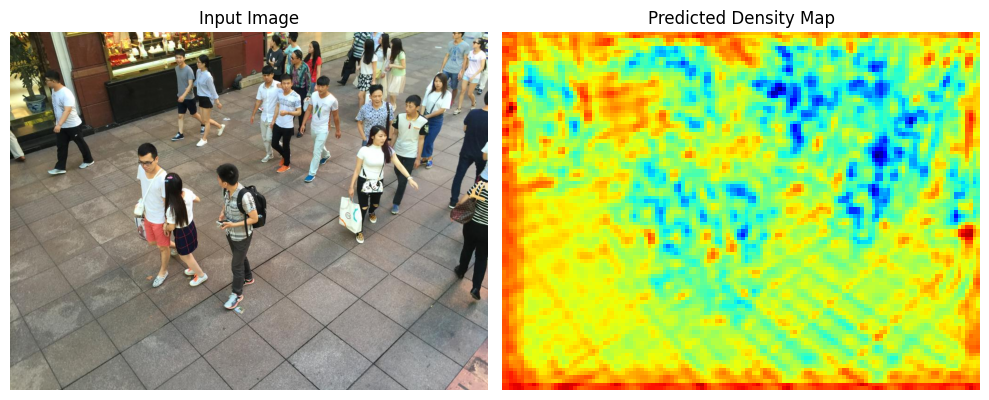

Predicted Density Map:
[[[[-0.03683389]
   [-0.03206582]
   [-0.04682166]
   ...
   [-0.04454609]
   [-0.11260371]
   [-0.11282745]]

  [[-0.05003838]
   [-0.04516564]
   [-0.03869107]
   ...
   [-0.05574037]
   [-0.12165233]
   [-0.10486609]]

  [[-0.07769781]
   [-0.08118673]
   [-0.07933336]
   ...
   [-0.1293158 ]
   [-0.18192992]
   [-0.13764451]]

  ...

  [[-0.0377342 ]
   [-0.02937217]
   [-0.0151223 ]
   ...
   [-0.09097432]
   [-0.08530422]
   [-0.07668287]]

  [[-0.02153063]
   [-0.01951641]
   [-0.00036805]
   ...
   [ 0.00126702]
   [-0.01200249]
   [-0.01699773]]

  [[-0.01738758]
   [-0.01789272]
   [-0.00487772]
   ...
   [ 0.01128159]
   [-0.00618082]
   [-0.01969935]]]]


In [33]:
def inference_on_single_image(model, image_path):
    # Load and preprocess the input image
    input_img = np.array(Image.open(image_path).convert('RGB')) / 255.0
    
    # Reshape the input image to match the model's input shape
    input_img = np.expand_dims(input_img, axis=0)
    
    # Perform inference using the trained model
    pred_density_map = model.predict(input_img)
    print(f'Shape of the Predicted Model {pred_density_map.shape}')
    
    # Plot the input image and predicted density map
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot input image
    axes[0].imshow(input_img.squeeze())
    axes[0].set_title('Input Image')
    axes[0].axis('off')

    # Plot predicted density map
    density_map_img = axes[1].imshow(pred_density_map.squeeze(), cmap=CM.jet)
    axes[1].set_title('Predicted Density Map')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Print the predicted density map array
    print("Predicted Density Map:")
    print(pred_density_map)

    return pred_density_map

# Perform inference on the single image
predicted_density_map = inference_on_single_image(model, '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/test_data/images/IMG_1.jpg')

In [34]:
np.sum(predicted_density_map[0])

-2209.3242

Ground Truth Maps 21.089601516723633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


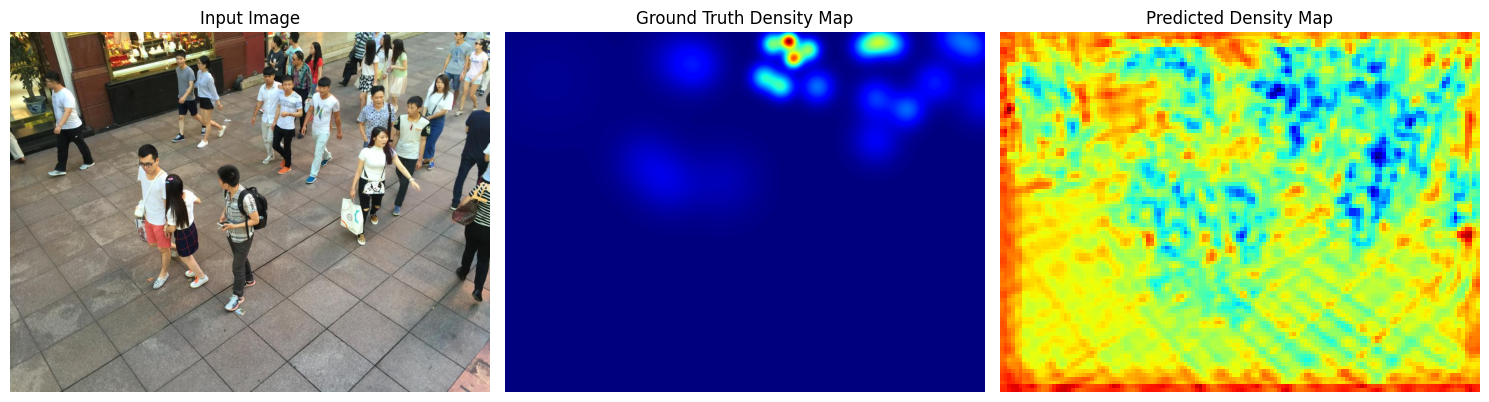

Predicted Density Map:
[[[[-0.03683389]
   [-0.03206582]
   [-0.04682166]
   ...
   [-0.04454609]
   [-0.11260371]
   [-0.11282745]]

  [[-0.05003838]
   [-0.04516564]
   [-0.03869107]
   ...
   [-0.05574037]
   [-0.12165233]
   [-0.10486609]]

  [[-0.07769781]
   [-0.08118673]
   [-0.07933336]
   ...
   [-0.1293158 ]
   [-0.18192992]
   [-0.13764451]]

  ...

  [[-0.0377342 ]
   [-0.02937217]
   [-0.0151223 ]
   ...
   [-0.09097432]
   [-0.08530422]
   [-0.07668287]]

  [[-0.02153063]
   [-0.01951641]
   [-0.00036805]
   ...
   [ 0.00126702]
   [-0.01200249]
   [-0.01699773]]

  [[-0.01738758]
   [-0.01789272]
   [-0.00487772]
   ...
   [ 0.01128159]
   [-0.00618082]
   [-0.01969935]]]]


In [35]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def inference_on_single_image(model, image_path, ground_truth_density_map_path):
    # Load and preprocess the input image
    input_img = np.array(Image.open(image_path).convert('RGB')) / 255.0
    
    # Load the ground truth density map
    file_open = h5py.File(ground_truth_density_map_path,'r')
    
    ground_truth_density_map = np.asarray(file_open['density'])
    
    print(f'Ground Truth Maps {np.sum(ground_truth_density_map)}')
    
    # Reshape the input image to match the model's input shape
    input_img = np.expand_dims(input_img, axis=0)
    
    # Perform inference using the trained model
    pred_density_map = model.predict(input_img)
    
    # Plot the input image, ground truth density map, and predicted density map
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot input image
    axes[0].imshow(input_img.squeeze())
    axes[0].set_title('Input Image')
    axes[0].axis('off')

    # Plot ground truth density map
    axes[1].imshow(ground_truth_density_map.squeeze(), cmap='jet')
    axes[1].set_title('Ground Truth Density Map')
    axes[1].axis('off')

    # Plot predicted density map
    density_map_img = axes[2].imshow(pred_density_map.squeeze(), cmap='jet')
    axes[2].set_title('Predicted Density Map')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    # Print the predicted density map array
    print("Predicted Density Map:")
    print(pred_density_map)

    return pred_density_map

image_path =  '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/test_data/images/IMG_1.jpg'
ground_truth_path = '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/test_data/ground-truth-h5/IMG_1.h5'
predicted_density_map = inference_on_single_image(model,image_path,ground_truth_path)


Input image shape: (2, 768, 1024, 3)
Output image shape: (2, 96, 128, 1)


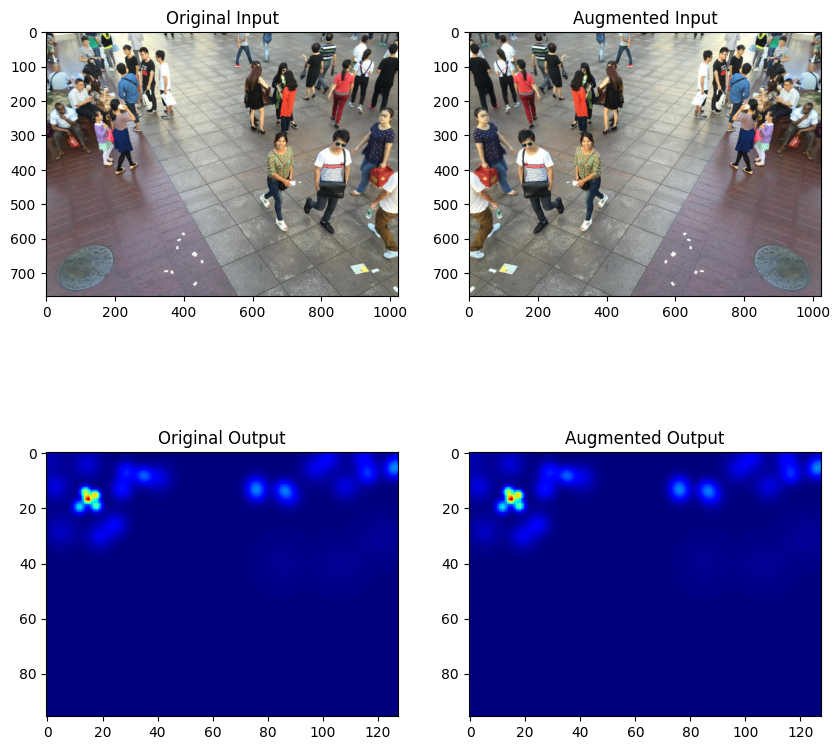

In [50]:
class DataGenerator(Sequence):
    def __init__(self, images_dir, batch_size=32, shuffle=True, augmentation=True, normalize=True, convert_dtype=True, **kwargs):
        super().__init__(**kwargs)
        self.images_dir = images_dir
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augmentation = augmentation
        self.normalize = normalize
        self.convert_dtype = convert_dtype
        self.image_paths = glob.glob(os.path.join(images_dir, '*.jpg'))
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)
        
        # Initialize ImageDataGenerator for augmentation
        if self.augmentation:
            self.data_generator = ImageDataGenerator(horizontal_flip=True)
    
    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))
    

    def __getitem__(self, index):
        batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        batch_inputs, batch_outputs = [], []
        for i in batch_indexes:
            img_path = self.image_paths[i]
            try:
                input_img = self._load_input(img_path)
                print(f"Input image shape: {input_img.shape}")  # Add this line
                output_img = self._load_output(img_path)
                print(f"Output image shape: {output_img.shape}")  # Add this line
                # Convert input and output data types if needed
                if self.convert_dtype:
                    input_img = tf.cast(input_img, dtype=tf.float32)  # Convert input to float32
                    output_img = tf.cast(output_img, dtype=tf.float32)  # Convert output to float32
                batch_inputs.append(input_img)
                batch_outputs.append(output_img)
            except Exception as e:
                print(f"Error occurred while processing image {img_path}. Error: {e}")

        return np.array(batch_inputs), np.array(batch_outputs)


    def _load_input(self, img_path):
        try:
            img = Image.open(img_path).convert('RGB')
            img = np.array(img)
            if self.normalize:
                img = img / 255.0
            # Apply data augmentation (both original and augmented image are returned)
            img_augmented = img.copy()
            if self.augmentation:
                img_augmented = self.data_generator.random_transform(img_augmented)
                return np.stack([img, img_augmented])
            else:
                return img
        except Exception as e:
            print(f"Error occurred while loading input image {img_path}. Error: {e}")


    def _load_output(self, img_path):
        try:
            gt_path = img_path.replace('.jpg', '.h5').replace('images', 'ground-truth-h5')
            gt_file = h5py.File(gt_path, 'r')
            target = np.asarray(gt_file['density'])
            target = cv2.resize(target, (int(target.shape[1]/8), int(target.shape[0]/8)), interpolation=cv2.INTER_CUBIC) * 64
            target = np.expand_dims(target, axis=-1)
            target_augmented = target.copy() 
            # Apply data augmentation (both original and augmented output are returned)
            if self.augmentation:
                target_augmented = self.data_generator.random_transform(target_augmented)
                return np.stack([target, target_augmented])
            else:
                return target
        except Exception as e:
            print(f"Error occurred while loading output image {img_path}. Error: {e}")


    def generate(self):
        while True:
            if self.shuffle:
                np.random.shuffle(self.indexes)
            for i in range(self.__len__()):
                yield self.__getitem__(i)


image_path =  '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/test_data/images'
# Create an instance of the DataGenerator
data_gen = DataGenerator(images_dir= image_path, batch_size=1, shuffle=True, augmentation=True, normalize=True, convert_dtype=True)

# Get a batch of data
inputs, outputs = data_gen.__getitem__(1)

# Visualize the first original and augmented image in the batch
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original input
axs[0, 0].imshow(inputs[0][0])
axs[0, 0].set_title('Original Input')

# Augmented input
axs[0, 1].imshow(inputs[0][1])
axs[0, 1].set_title('Augmented Input')

# Original output
axs[1, 0].imshow(outputs[0][0], cmap='jet')
axs[1, 0].set_title('Original Output')

# Augmented output
axs[1, 1].imshow(outputs[0][1], cmap='jet')
axs[1, 1].set_title('Augmented Output')

plt.show()
